In [2]:
# Primer paso: Explorar el dataset real
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [21]:
# Mostrar todas las filas
pd.set_option("display.max_rows", None)

# Mostrar todas las columnas
pd.set_option("display.max_columns", None)

# Mostrar todo el contenido de las celdas
pd.set_option("display.max_colwidth", None)

# Evitar truncamiento horizontal
pd.set_option("display.expand_frame_repr", False)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [22]:
# Leyendo datos
print("Cargando dataset de Google Analytics...")
df = pd.read_parquet('../data/raw/data_sample.parquet')

Cargando dataset de Google Analytics...


In [23]:
print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Dimensiones: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print(f"Total de columnas: {len(df.columns)}")
# Mostrar las primeras filas del DataFrame
df_10 = df[df.columns[:10]]
df_5 = df[df.columns[:5]]
print("\nPrimeras filas:")
print(df_10.head())

=== INFORMACIÓN BÁSICA DEL DATASET ===
Dimensiones: (74457, 77)
Columnas: ['transaction_date', 'parsed_date', 'transaction_id', 'transaction_revenue_usd', 'transaction_tax_usd', 'transaction_shipping_usd', 'transaction_affiliation', 'currency_code', 'product_sku', 'product_name', 'product_category', 'product_brand', 'product_variant', 'product_quantity', 'product_price_usd', 'product_revenue_usd', 'is_impression', 'is_click', 'promo_id', 'promo_name', 'promo_creative', 'promo_position', 'visitor_id', 'session_id', 'session_number', 'session_start_time', 'total_visits', 'total_hits', 'total_pageviews', 'time_on_site_seconds', 'bounces', 'new_visits', 'traffic_source', 'traffic_medium', 'campaign', 'keyword', 'ad_content', 'referral_path', 'is_true_direct', 'channel_grouping', 'browser', 'browser_version', 'operating_system', 'os_version', 'is_mobile', 'mobile_device_brand', 'mobile_device_model', 'device_category', 'device_language', 'screen_resolution', 'continent', 'sub_continent', 'c

In [24]:
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df_5.describe(include='all'))
print("\n=== VALORES NULOS ===")
null_analysis = df_10.isnull().sum()
print(null_analysis[null_analysis > 0])


=== ESTADÍSTICAS DESCRIPTIVAS ===
       transaction_date parsed_date   transaction_id  transaction_revenue_usd  transaction_tax_usd
count             74457       74457            74457             36744.000000         25581.000000
unique              365         365            11551                      NaN                  NaN
top            20161212  2016-12-12  ORD201703041515                      NaN                  NaN
freq                550         550              146                      NaN                  NaN
mean                NaN         NaN              NaN               287.388543            22.767936
std                 NaN         NaN              NaN              1028.358260            31.563780
min                 NaN         NaN              NaN                 1.200000             1.260000
25%                 NaN         NaN              NaN                46.960000             8.950000
50%                 NaN         NaN              NaN                96.900

In [8]:
print("\n=== INFORMACIÓN DE TRANSACCIONES ===")
# Verificar columnas relacionadas con transacciones
transaction_cols = [col for col in df.columns if 'transact' in col.lower() or 'revenue' in col.lower()]
print("Columnas de transacción/revenue:", transaction_cols)

print("\n=== INFORMACIÓN DE PRODUCTOS ===")
product_cols = [col for col in df.columns if 'product' in col.lower() or 'sku' in col.lower()]
print("Columnas de producto:", product_cols)


=== INFORMACIÓN DE TRANSACCIONES ===
Columnas de transacción/revenue: ['transaction_date', 'transaction_id', 'transaction_revenue_usd', 'transaction_tax_usd', 'transaction_shipping_usd', 'transaction_affiliation', 'product_revenue_usd']

=== INFORMACIÓN DE PRODUCTOS ===
Columnas de producto: ['product_sku', 'product_name', 'product_category', 'product_brand', 'product_variant', 'product_quantity', 'product_price_usd', 'product_revenue_usd']


In [37]:
# 1. Análisis de la variable objetivo: product_quantity
print("1. ANÁLISIS DE UNIDADES VENDIDAS (product_quantity):")
print(f"Valores nulos: {df['product_quantity'].isnull().sum()}")
print(f"Valores cero: {(df['product_quantity'] == 0).sum()}")
print(f"Valores positivos: {(df['product_quantity'] > 0).sum()}")

# Estadísticas de unidades vendidas
unidades_positivas = df[df['product_quantity'] > 0]['product_quantity']
print(f"\nESTADÍSTICAS DE UNIDADES VENDIDAS (>0):")
print(f"Total unidades vendidas: {unidades_positivas.sum()}")
print(f"Promedio unidades por transacción: {unidades_positivas.mean():.2f}")
print(f"Máximo unidades en una transacción: {unidades_positivas.max()}")
print(f"Mediana: {unidades_positivas.median()}")
# 2. Distribución de cantidades
print(f"\nDISTRIBUCIÓN DE CANTIDADES:")
cantidad_counts = df['product_quantity'].value_counts().sort_index().head(10)
print("Frecuencia de cantidades:")
for cantidad, freq in cantidad_counts.items():
    print(f"  {cantidad} unidad(es): {freq} transacciones")

1. ANÁLISIS DE UNIDADES VENDIDAS (product_quantity):
Valores nulos: 37639
Valores cero: 0
Valores positivos: 36818

ESTADÍSTICAS DE UNIDADES VENDIDAS (>0):
Total unidades vendidas: 236149.0
Promedio unidades por transacción: 6.41
Máximo unidades en una transacción: 1000.0
Mediana: 1.0

DISTRIBUCIÓN DE CANTIDADES:
Frecuencia de cantidades:
  1.0 unidad(es): 23636 transacciones
  2.0 unidad(es): 3510 transacciones
  3.0 unidad(es): 1415 transacciones
  4.0 unidad(es): 885 transacciones
  5.0 unidad(es): 1429 transacciones
  6.0 unidad(es): 402 transacciones
  7.0 unidad(es): 181 transacciones
  8.0 unidad(es): 242 transacciones
  9.0 unidad(es): 56 transacciones
  10.0 unidad(es): 1202 transacciones


In [39]:
# 3. Unidades por producto
print(f"\nUNIDADES POR PRODUCTO (Top 5):")
unidades_por_producto = df.groupby('product_name')['product_quantity'].sum().sort_values(ascending=False).head(5)
for producto, unidades in unidades_por_producto.items():
    print(f"  {producto[:40]}...: {unidades} unidades")

# 4. Unidades por día
print(f"\nUNIDADES POR DÍA:")
unidades_por_dia = df.groupby('parsed_date')['product_quantity'].sum()
print(f"• Mejor día: {unidades_por_dia.idxmax().date()} - {unidades_por_dia.max()} unidades")
print(f"• Promedio diario: {unidades_por_dia.mean():.1f} unidades")
print(f"• Total días con ventas: {(unidades_por_dia > 0).sum()}")
# 5. Patrones de compra (cuántas unidades suelen comprar)
print(f"\nPATRONES DE COMPRA:")
transacciones_con_unidades = df[df['product_quantity'] > 0]
print(f"Transacciones con al menos 1 unidad: {len(transacciones_con_unidades)}")
print(f"Porcentaje sobre total: {len(transacciones_con_unidades)/len(df)*100:.1f}%")


UNIDADES POR PRODUCTO (Top 5):
  Maze Pen...: 16618.0 unidades
  Google 22 oz Water Bottle...: 15206.0 unidades
  Google Sunglasses...: 10981.0 unidades
  Recycled Paper Journal Set...: 7800.0 unidades
  Ballpoint Pen Blue...: 6512.0 unidades

UNIDADES POR DÍA:
• Mejor día: 2017-04-05 - 7382.0 unidades
• Promedio diario: 647.0 unidades
• Total días con ventas: 365

PATRONES DE COMPRA:
Transacciones con al menos 1 unidad: 36818
Porcentaje sobre total: 49.4%



VISUALIZACIONES PARA UNIDADES VENDIDAS


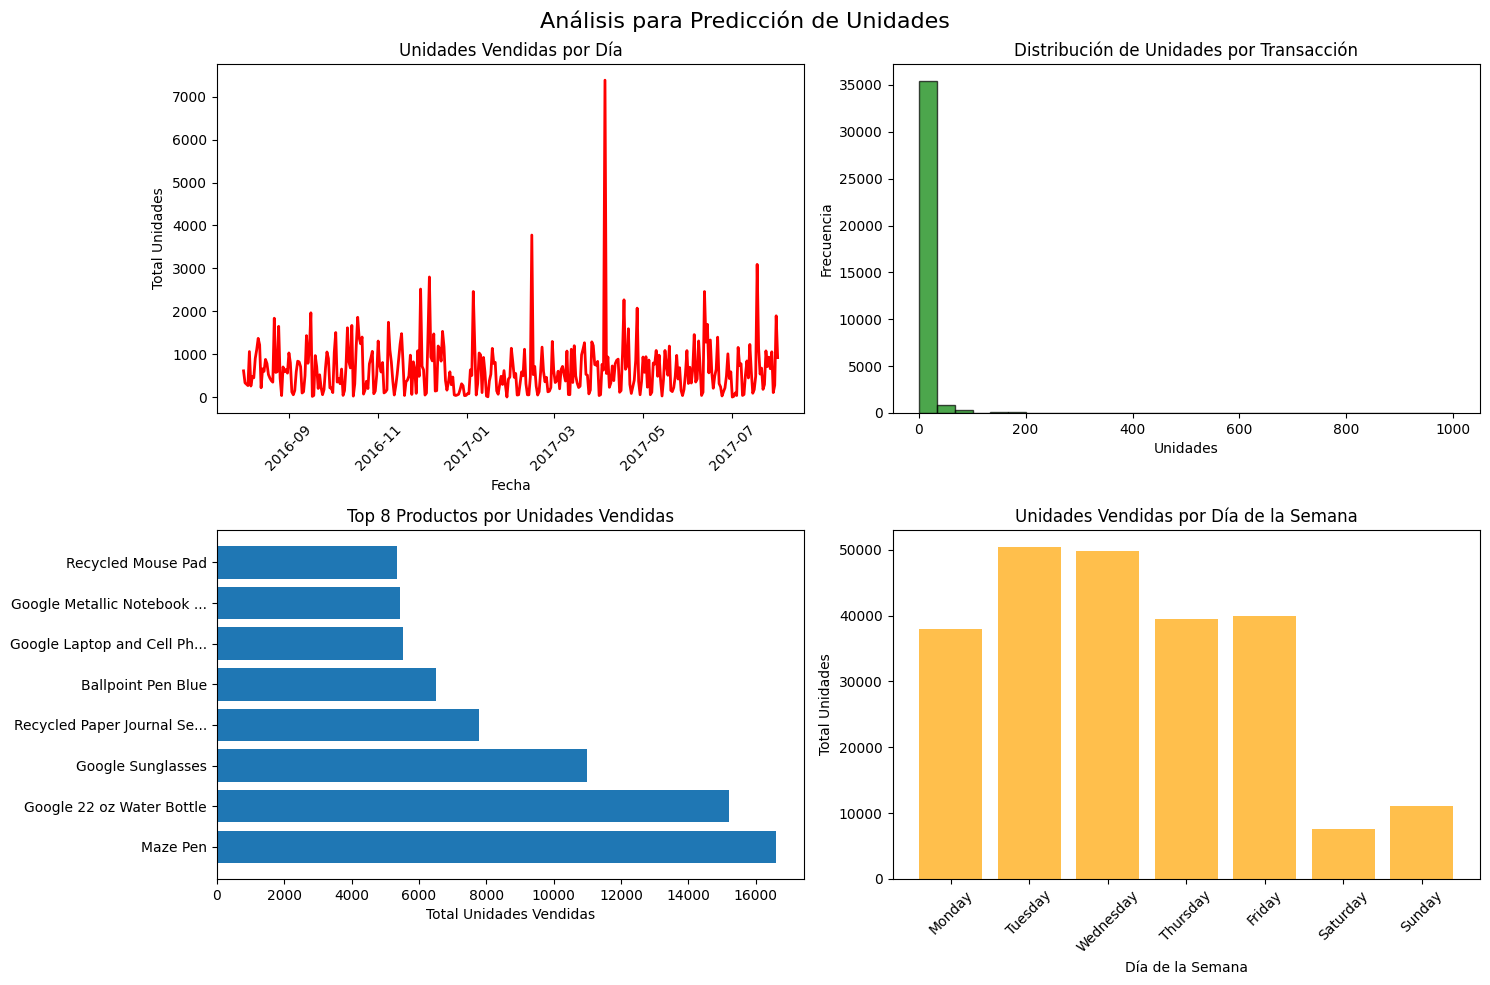

In [48]:
# VISUALIZACIONES PARA PREDICCIÓN DE UNIDADES
print("\nVISUALIZACIONES PARA UNIDADES VENDIDAS")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis para Predicción de Unidades', fontsize=16)

# 1. Serie temporal de unidades diarias
unidades_diarias = df.groupby('parsed_date')['product_quantity'].sum()
axes[0, 0].plot(unidades_diarias.index, unidades_diarias.values, linewidth=2, color='red')
axes[0, 0].set_title('Unidades Vendidas por Día')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('Total Unidades')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Distribución de cantidades por transacción
unidades_por_transaccion = df[df['product_quantity'] > 0]['product_quantity']
axes[0, 1].hist(unidades_por_transaccion, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Distribución de Unidades por Transacción')
axes[0, 1].set_xlabel('Unidades')
axes[0, 1].set_ylabel('Frecuencia')

# 3. Top productos por unidades vendidas
top_productos_unidades = df.groupby('product_name')['product_quantity'].sum().sort_values(ascending=False).head(8)
axes[1, 0].barh(range(len(top_productos_unidades)), top_productos_unidades.values)
axes[1, 0].set_yticks(range(len(top_productos_unidades)))
axes[1, 0].set_yticklabels([name[:25] + '...' if len(name) > 25 else name for name in top_productos_unidades.index])
axes[1, 0].set_title('Top 8 Productos por Unidades Vendidas')
axes[1, 0].set_xlabel('Total Unidades Vendidas')

# 4. Unidades por día de la semana
df['day_of_week'] = df['parsed_date'].dt.day_name()
unidades_por_dia_semana = df.groupby('day_of_week')['product_quantity'].sum()
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
unidades_por_dia_semana = unidades_por_dia_semana.reindex(dias_orden)
axes[1, 1].bar(unidades_por_dia_semana.index, unidades_por_dia_semana.values, color='orange', alpha=0.7)
axes[1, 1].set_title('Unidades Vendidas por Día de la Semana')
axes[1, 1].set_xlabel('Día de la Semana')
axes[1, 1].set_ylabel('Total Unidades')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()